# Introduction

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
  -618.1  36169.0  71426.6  74768.3 105839.1 567595.4 


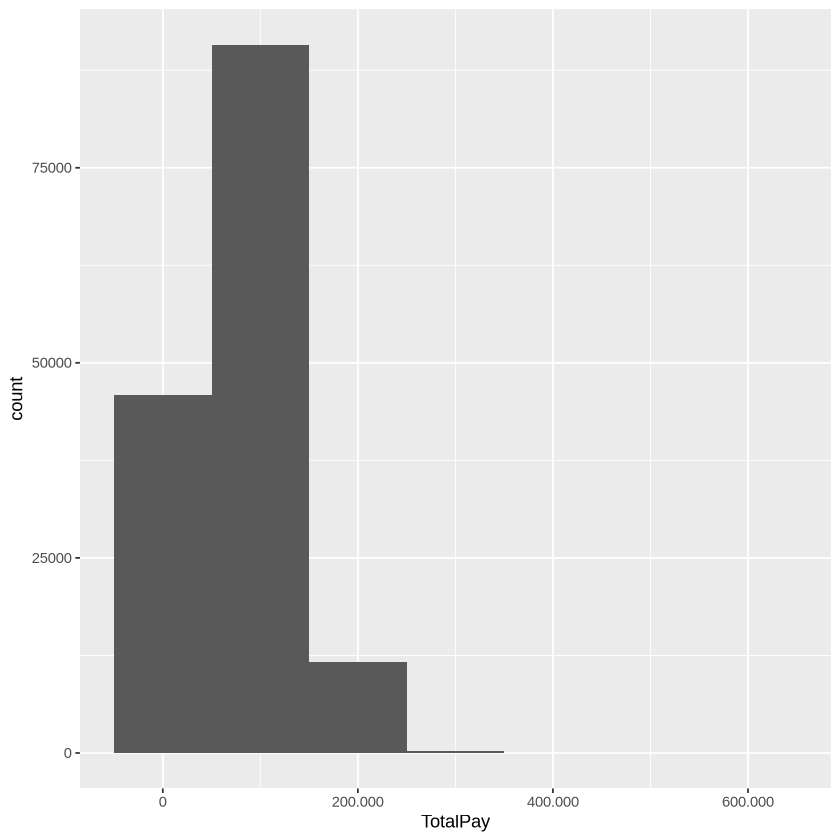

In [1]:
library(data.table)
library(ggplot2)
library(scales)

dt <- fread("data/sf-salaries.csv")

print(summary(dt$TotalPay))


g <- ggplot(data = dt, mapping = aes(TotalPay)) +
  geom_histogram(binwidth = 100000) + 
  scale_x_continuous(labels = comma_format(big.mark = ".", decimal.mark = ","))
print(g)

In [2]:
dt <- fread("data/sf-salaries.csv")
dt[, `:=` (
  JobTitle = as.factor(JobTitle),
  Agency = as.factor(Agency),
  Status = as.factor(Status)
)]

print(summary(dt))

       Id         EmployeeName                               JobTitle     
 Min.   :     1   Length:148654      Transit Operator            :  7036  
 1st Qu.: 37164   Class :character   Special Nurse               :  4389  
 Median : 74328   Mode  :character   Registered Nurse            :  3736  
 Mean   : 74328                      Public Svc Aide-Public Works:  2518  
 3rd Qu.:111491                      Police Officer 3            :  2421  
 Max.   :148654                      Custodian                   :  2418  
                                     (Other)                     :126136  
   BasePay          OvertimePay          OtherPay           Benefits        
 Length:148654      Length:148654      Length:148654      Length:148654     
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
               

### standard deviation

In [3]:
dt <- fread("data/sf-salaries.csv")
dt[, `:=` (
  JobTitle = as.factor(JobTitle),
  Agency = as.factor(Agency),
  Status = as.factor(Status)
)]

print(mean(dt$TotalPay))
print(sqrt(sum((dt$TotalPay - mean(dt$TotalPay))^2)/(length(dt$TotalPay))))
print(sd(dt$TotalPay))
print(var(dt$TotalPay))

[1] 74768.32
[1] 50516.84
[1] 50517.01
[1] 2551967822


### Correlation

In [5]:
dt <- fread("data/sf-salaries.csv")
dt <- dt[BasePay != "Not Provided" & OvertimePay != "Not Provided"]
dt[, `:=` (
  JobTitle = as.factor(JobTitle),
  Agency = as.factor(Agency),
  Status = as.factor(Status),
  BasePay = as.numeric(BasePay),
  OvertimePay = as.numeric(OvertimePay)
)]

print(cor(dt$BasePay, dt$TotalPay, use = "complete.obs"))
print(cor(dt$OvertimePay, dt$TotalPay, use = "complete.obs"))

[1] 0.9544936
[1] 0.5048589
